<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/3_2%EA%B0%95_Logistic_Regression%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 5)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.7236 - loss: 7.9723 - val_binary_accuracy: 1.0000 - val_loss: 0.0041
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8931 - loss: 0.4342 - val_binary_accuracy: 1.0000 - val_loss: 0.0174
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9027 - loss: 0.2503 - val_binary_accuracy: 1.0000 - val_loss: 0.0445
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9450 - loss: 0.2224 - val_binary_accuracy: 1.0000 - val_loss: 0.0699
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7869 - loss: 0.2677 - val_binary_accuracy: 1.0000 - val_loss: 0.0551
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8978 - loss: 0.1495 - val_binary_accuracy: 1.0000 - val_loss: 0.0454
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7092 - loss: 0.3499 - val_binary_accuracy: 1.0000 - val_loss: 0.0426
Epoch 8/200


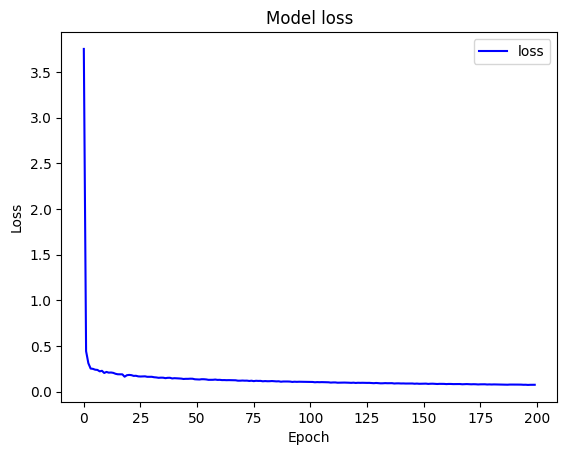

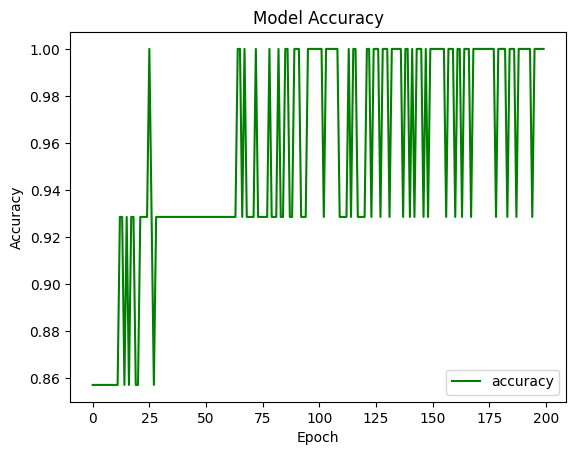

5/5 - 0s - 5ms/step - binary_accuracy: 1.0000 - loss: 0.0372
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


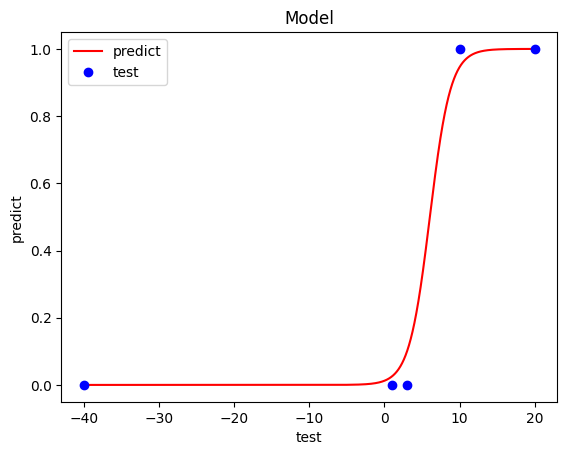

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.97300696]
 [0.99998   ]
 [1.        ]
 [1.        ]
 [1.        ]]


In [16]:
# 단순한 로지스틱 회귀 예제 (텐서플로우2)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# x(입력), y(결과) 데이터
x_train = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50,
                    -15, 1, 3, -7, 2.5,
                    7, 77, 33, 52, 80])
y_train = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                    0, 0, 0, 0, 0,
                    1, 1, 1, 1, 1])

# train 데이터와 test 데이터로 분리 (80:20)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=77)

# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
model = tf.keras.models.Sequential()
# 입력이 1차원이고 출력이 1차원임을 뜻함 - Dense는 레이어의 종류
model.add(tf.keras.layers.Dense(5, input_dim=1))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 종합
model.summary()

# Optimizer: Stochastic gradient descent (확률적 경사 하강법)
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# Loss function: binary_crossentropy (이진 교차 엔트로피)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
hist = model.fit(x_train, y_train, batch_size=1, epochs=200, validation_split=0.2)

# 모델 손실 함수 시각화
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 정확도 시각화
plt.plot(hist.history['binary_accuracy'], 'g-', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 함수 계산
model.evaluate(x_test, y_test, batch_size=1, verbose=2)

# 모델 시각화
line_x = np.arange(min(x_test), max(x_test), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(x_test, y_test, 'bo')
plt.title('Model')
plt.xlabel('test')
plt.ylabel('predict')
plt.legend(['predict', 'test'], loc='upper left')
plt.show()

# 모델 테스트
#print(model.predict([1, 2, 3, 4, 5]))
#print(model.predict([11.0, 21.0, 31.0, 41.0, 500.0]))

# 예측할 데이터의 1차원 배열을 2차원 배열로 변환 (예: [11, 21, 31, 41, 500] -> [[11], [21], [31\], [41], [500]])
test_input = np.array([11, 21, 31, 41, 500]).reshape(-1, 1)

# 모델 예측
predictions = model.predict(test_input)

# 예측 결과 출력
print(predictions)
